In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from resources.mfcc import emphasis__, framing__, windowing__, fft__, melbank__, dct__
import numpy as np
from fastdtw import fastdtw

In [24]:
def vis_signal(y, sr):
  plt.figure(figsize=(10, 3))
  librosa.display.waveshow(y, sr=sr)
def vis_emphasis(y_origin, y_emphasis, sr):
  s_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y_origin)), ref=np.max, top_db=None)
  s_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_emphasis)), ref=np.max, top_db=None)

  plt.figure(figsize=(15, 5))

  # Row 1 Col 1: Original signal spectrogram
  plt.subplot(2, 2, 1)
  librosa.display.specshow(s_orig, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Original Signal Spectrogram')

  # Row 1 Col 2: Pre-emphasized signal spectrogram
  plt.subplot(2, 2, 2)
  librosa.display.specshow(s_preemph, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Pre-emphasized Signal Spectrogram')

  # Row 2 Col 1: Original waveform
  plt.subplot(2, 2, 3)
  librosa.display.waveshow(y_origin, sr=sr)
  plt.title('Original Waveform')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')

  # Row 2 Col 2: Pre-emphasized waveform
  plt.subplot(2, 2, 4)
  librosa.display.waveshow(y_emphasis, sr=sr)
  plt.title('Pre-emphasized Waveform')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.tight_layout()
  plt.show()
def vis_windowed(y, sr):
  plt.figure(figsize=(8, 3))
  plt.title("Windowed signal")
  librosa.display.waveshow(y, sr=sr)
  plt.show()
def vis_fft(y):
  plt.figure(figsize=(8, 3))
  plt.title("RFFT")
  plt.plot(y)
  plt.show()
def vis_triangle_melbank(nfilt, fbank):
  plt.figure(figsize=(8, 3))
  for i in range(nfilt):
    plt.plot(fbank[i])
  plt.xlabel('FFT Bins')
  plt.ylabel('Amplitude')
  plt.grid(True)
  plt.show()
def plot_mel_spectrogram(mel_spectrogram, sample_rate, hop_length):
  plt.figure(figsize=(8, 2))
  plt.imshow(mel_spectrogram.T, aspect='auto', origin='lower')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Mel Spectrogram')
  plt.xlabel('Time [s]')
  plt.ylabel('Frequency [Hz]')
  plt.show()

def plot_mfcc_spectrogram(mfcc, sample_rate, hop_length):
  plt.figure(figsize=(8, 2))
  plt.imshow(mfcc.T, aspect='auto', origin='lower')
  plt.colorbar(format='%+2.0f dB')
  plt.title('MFCC Spectrogram')
  plt.xlabel('Time [s]')
  plt.ylabel('MFCC Coefficients')
  plt.show()

In [12]:
signal, sampling_rate = librosa.load("audio/train/Blank.mp3")
signal_2, sampling_rate_2 = librosa.load("audio/test/normal/50/Blank.mp3")
emphased_signal = emphasis__(signal)
emphased_signal_2 = emphasis__(signal_2)
framed_signal = framing__(signal=emphased_signal, frame_size=1, frame_stride=0.5, sampling_rate=sampling_rate)
framed_signal_2 = framing__(signal=emphased_signal_2, frame_size=1, frame_stride=0.5, sampling_rate=sampling_rate_2)
windowed_signal = windowing__(signal=framed_signal, sampling_rate=sampling_rate, frame_size=1)
windowed_signal_2 = windowing__(signal=framed_signal_2, sampling_rate=sampling_rate_2, frame_size=1)
fft_signal = fft__(signal=windowed_signal)
fft_signal_2 = fft__(signal=windowed_signal_2)
melbank_signal, fbank = melbank__(signal=fft_signal, NFFT=512, nfilt=40, sr=sampling_rate)
melbank_signal_2, fbank_2 = melbank__(signal=fft_signal_2, NFFT=512, nfilt=40, sr=sampling_rate_2)
dct_signal = dct__(signal=melbank_signal, coef=13)
dct_signal_2 = dct__(signal=melbank_signal_2, coef=13)


# ORIGINAL SIGNAL

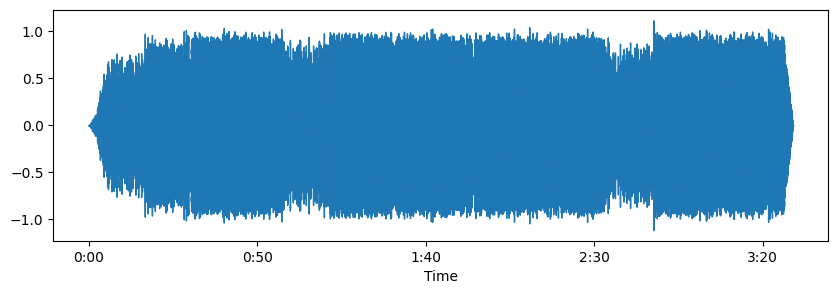

In [13]:
vis_signal(y=signal, sr=sampling_rate)

# PRE-EMPHASIS SIGNAL

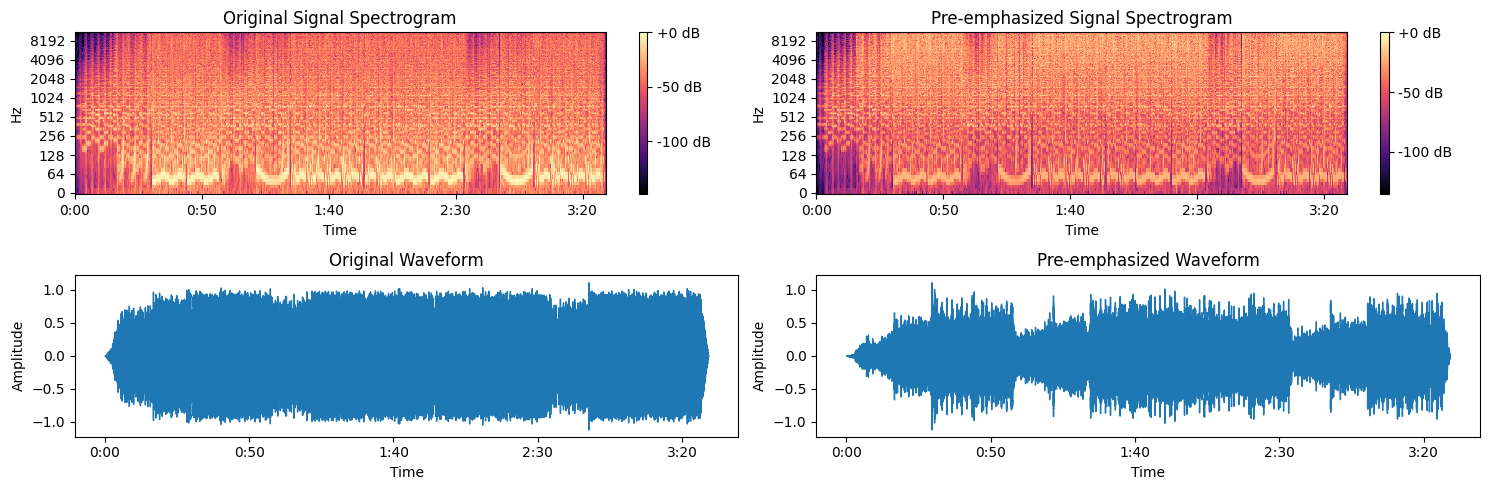

In [14]:
vis_emphasis(y_origin=signal, y_emphasis=emphased_signal, sr=sampling_rate)

# FRAMED AND WINDOWED SIGNAL

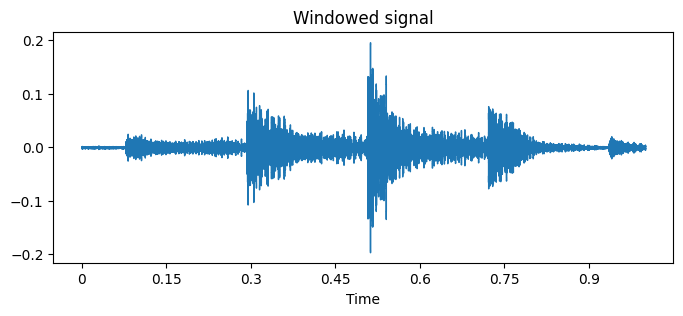

In [15]:
vis_windowed(y=windowed_signal[10], sr=sampling_rate)

# FFT SIGNAL

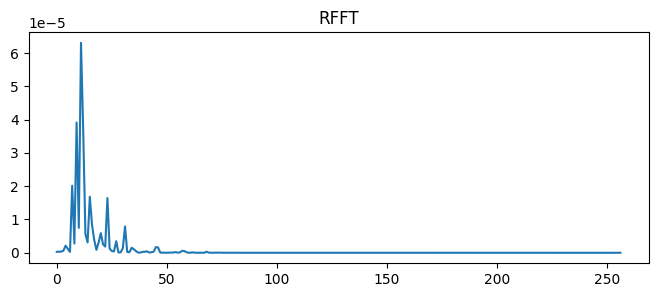

In [16]:
vis_fft(y=fft_signal[10])

# MELBANK FILTER

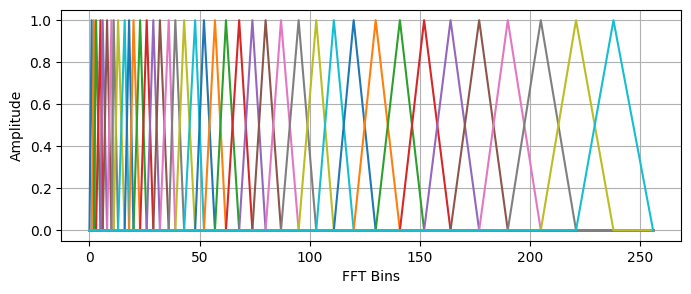

In [17]:
vis_triangle_melbank(nfilt=40, fbank=fbank)

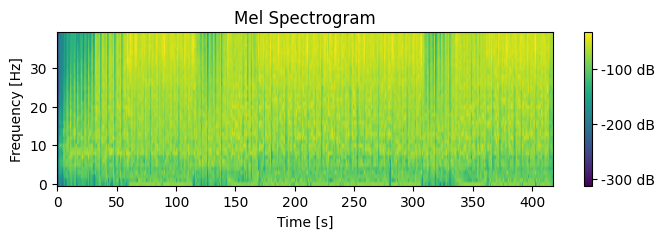

In [22]:
plot_mel_spectrogram(mel_spectrogram=melbank_signal, sample_rate=sampling_rate, hop_length=0.5)

(418, 40)

# DCT

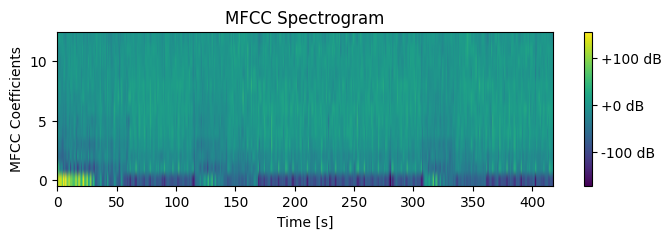

In [25]:
plot_mfcc_spectrogram(mfcc=dct_signal, sample_rate=sampling_rate, hop_length=0.5)

# WARPING DTW

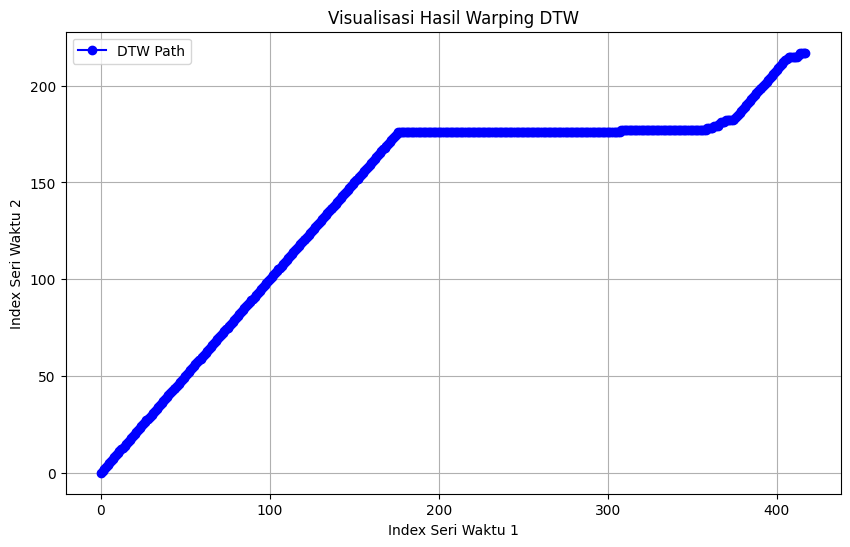

In [39]:
signal_a = dct_signal
signal_b = dct_signal_2

distance, path = fastdtw(signal_a, signal_b)
# Data hasil warping DTW

# Memisahkan koordinat x dan y
x = [point[0] for point in path]
y = [point[1] for point in path]

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='DTW Path')

# Menambahkan label dan judul
plt.title('Visualisasi Hasil Warping DTW')
plt.xlabel('Index Seri Waktu 1')
plt.ylabel('Index Seri Waktu 2')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

In [32]:
print(len(melbank_signal.T))

40
